### COLX 523: Advanced Corpus Linguistics
#### ## Corpus analysis 
#### Group 2
#### Team members: Gurpreet, Jin, Yundong, Ladan

In [3]:
from nltk import pos_tag, word_tokenize
from collections import Counter
from nltk.corpus import brown, movie_reviews, treebank, gutenberg
import json

In [4]:
counts = Counter(brown.words())

In [5]:
file_path = "../transcripts/en/ted_talks_en.json"       #update the link for the link in repo
f = open(file_path,encoding="utf-8")
file_en = json.load(f)

In [53]:
def process_text(text):
    paras = text.replace("\n", " ").strip(" ").replace("  ", " ").split("[PARAGRAPH]")
    return [para.strip(" ") for para in paras if len(para) > 1]

In [54]:
paragraphs = process_text(file_en[1]['text'])

In [63]:
def type_token_ratio(words, num_words):
    '''calculate type-token ratio from the corpus of word tokens (list of strings) using the first
    num_words tokens'''
    types = set([word.lower() for word in words[:num_words]])
    return len(types)/num_words

In [65]:
# Printing statistics of the corpus

no_tokens = 0
total_word_list = []
no_paragraphs = 0
for i in range (len(file_en)):
    no_paragraphs += (len(process_text(file_en[i]['text'])))
    for paragraph in (process_text(file_en[i]['text'])):
        paragraph_words = paragraph.split()
        for word in paragraph_words:
            total_word_list.append(word.lower())
        
print("Number of words is:", len(total_word_list))
print("Number of types is:", len(set(total_word_list)))
print("Number of paragraphs is:", no_paragraphs)
print("Number of transcripts is:", len(file_en))
print(f'Average number of words per talk is: {len(total_word_list)/len(file_en):.2f}')
print(f'Average number of words per pragraph is: {len(total_word_list)/no_paragraphs:.2f}')
print(f'Average number of paragraphs per talks is: {no_paragraphs / len(file_en):.2f}')
print(f'Type token ratio for the first 1000 words is: {type_token_ratio(total_word_list, 1000):}')

Number of words is: 1581289
Number of types is: 75929
Number of paragraphs is: 21927
Number of transcripts is: 780
Average number of words per talk is: 2027.29
Average number of words per pragraph is: 72.12
Average number of paragraphs per talks is: 28.11
Type token ratio for the first 1000 words is: 0.504


In [75]:
corpus_list = [movie_reviews, treebank, brown, gutenberg]
corpus_name_list = ['movie_reviews', 'treebank', 'brown', 'gutenberg']

In [78]:
for i in range (4):
    print(corpus_name_list[i])
    print("Number of words is:", len(corpus_list[i].words()))
    print("Number of types is:", len(set(corpus_list[i].words())))
    print(f'Type token ratio for the first 1000 words is: {type_token_ratio(corpus_list[i].words(), 1000):}')

movie_reviews
Number of words is: 1583820
Number of types is: 39768
Type token ratio for the first 1000 words is: 0.393
treebank
Number of words is: 100676
Number of types is: 12408
Type token ratio for the first 1000 words is: 0.448
brown
Number of words is: 1161192
Number of types is: 56057
Type token ratio for the first 1000 words is: 0.417
gutenberg
Number of words is: 2621613
Number of types is: 51156
Type token ratio for the first 1000 words is: 0.4


Brown Wordcloud:


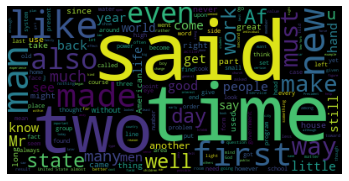

In [59]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

stopwords_set = stopwords.words("English")
stopwords_set.extend(["would", "could", "one", "may"])

print("Brown Wordcloud:")
wordcloud = WordCloud(stopwords = stopwords_set).generate(" ".join(brown.words()))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

TED Talks Wordcloud:


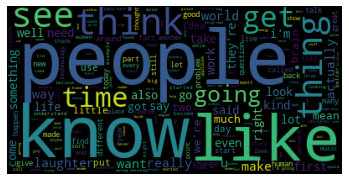

In [60]:
print("TED Talks Wordcloud:")
wordcloud = WordCloud(stopwords = stopwords_set).generate(" ".join(total_word_list))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [79]:
file_path = f"../transcripts/en/ted_talks_en.json"        #update the link for the link in repo
f = open(file_path,encoding="utf-8")
file_ko = json.load(f)

In [80]:
file_ko[0]

{'title': 'anita_collins_how_playing_an_instrument_benefits_your_brain',
 'talker': '애니타 콜린스',
 'text_length': 2325,
 'views': '10,175,572',
 'language': 'ko',
 'text': '\n[PARAGRAPH]\n음악가들이 악기를 연주할 때\n 두뇌 전체에서 불꽃이 터진다는\n사실을 알고 계셨나요?\n 겉으로 보기에는\n침착하고 집중해서\n 악보를 읽고, 정확하게 그동안 연습한\n연주를 하는 것처럼 보입니다.\n 하지만 두뇌 속에서는\n파티가 열리고 있습니다.\n[PARAGRAPH]\n이걸 어떻게 아냐고요?\n 사실, 최근 몇십년 동안,\n 신경과학자들은 엄청나게 \n획기적인 발전을 이룩해왔고\n FMRi와 PET 스캐너 같은 도구를\n사용해 실시간으로 두뇌를 관찰하여\n 두뇌가 어떻게 작동하는지에 대한\n이해의 폭을 넓혔습니다.\n FMRi나 PET 스캐너에\n연결된 상태로\n 읽기나 수학문제 풀이와 같은\n과제를 수행하는 동안,\n 각 과제 해결에 해당되는 두뇌 영역의\n 활동을 관찰할 수 있었습니다.\n 하지만 연구원들이 참가자에게\n음악을 듣게 하였을 때,\n 그들은 불꽃놀이를 보았습니다.\n 소리를 들었을 때\n두뇌의 여러 영역에서\n 한꺼번에 불이 켜졌고,\n 멜로디나 리듬같은 요소를\n이해하기 위해 분리되었다가\n 통합적인 음악 경험으로\n다시 합쳐졌습니다.\n 우리 두뇌는 이 모든 일을\n순식간에 해냅니다.\n 음악을 처음 듣고 발로 \n박자를 맞추는 시간 안에 일어나죠.\n[PARAGRAPH]\n하지만 과학자들이\n음악청취자의 두뇌관찰이 아닌\n 음악가들의 두뇌를 관찰하기 시작했을때,\n 뒷마당의 작은 불꽃놀이는\n기념일 축제처럼 커졌습니다.\n 음악을 듣고 있을 때 두뇌에서는\n 꽤 흥미로운 일들이 일어나긴 하지만,\n 음악을 직접 연주하고 있을 때는 \n전신 운동을 하는 것과 같습니다.\n 신경과학자들은 두뇌의 여러 영역에\

In [90]:
my_set = set()
for dictionary in file_ko:
    my_set.add(dictionary['title'])
print(len(my_set))    

748


In [81]:
file_path = f"../transcripts/en/ted_talks_en.json"        #update the link for the link in repo
f = open(file_path,encoding="utf-8")
file_zh_cn = json.load(f)

In [83]:
file_zh_cn[0]

{'title': 'elizabeth_hellmuth_margulis_why_we_love_repetition_in_music',
 'talker': 'Elizabeth Hellmuth Margulis',
 'text_length': 1460,
 'views': '1,241,257',
 'language': 'zh-cn',
 'text': '\n[PARAGRAPH]\n在你最喜欢的歌曲中，高潮部分重复了几遍？\n 花些时间想一想，你一共听了它几遍？\n 事实上，即使你听了它没有几百次，也有几十次了\n 并且并不是只有西方的流行歌曲才会经常重复播放\n 世界各地的音乐都会重复的播放\n 那么，为什么音乐都会被重复的播放呢？\n 原因之一就是心理学家的所提出的曝光效应\n 简而言之，人们更喜欢他们之前曾经遇到过的东西\n 举个例子，电台播放了一首我们并不是很感冒的歌\n 但是我们又在杂货店，在电影院\n 和在街角听到了这首歌\n 不久，我们就会打着节拍，开始唱这首歌\n 甚至下载这首歌\n 这种曝光效应不仅仅体现在歌曲上\n 它也会体现在各种事情上，从图形到超级碗的广告都有它的身影\n 但是，有没有特别的因素使音乐的重复如此普遍？\n 在调查中，心理学家让人们去听一些乐曲\n 一些没有明显重复的乐曲\n 他们听了一些音乐片段，这些片段有些是未经改动的\n 有些则是人工添加重复片段的\n 即使在那些未经改动的乐曲中\n 有些是被20世纪最杰出的作曲家谱写的\n 而那些包含重复片段的乐曲则是用音频编辑器硬生生的修改的\n 人们依旧认为包含重复片段的乐曲更令人愉悦，使人更感兴趣\n 甚至更像是由人类作曲家谱写的\n 重复的音乐如此使人无法抗拒\n 还记得经典木偶剧场里面的“Maha Maha”吗？\n 如果你之前听过这个\n 那在我唱出“maha maha”之后\n[PARAGRAPH]\n你一定会情不自禁的唱出“do doo do do do”\n 重复使音乐的节拍相连\n 下一节拍自然而然的连了进来\n 因此当你听到一些音符的时候，你已经在脑海里想到了下一个音符\n 你会情不自禁的唱下去\n 甚至你可能都不会注意到自己哼歌的声音越来越大\n 最近的调查表明当人们听到音乐中的一节被重复\n 人们就很可能随着音乐摇摆或者打节拍\n 重

In [89]:
my_set = set()
for dictionary in file_zh_cn:
    my_set.add(dictionary['title'])
print(len(my_set))    

519


In [84]:
print(len(file_zh_cn))

524


In [91]:
my_set = set()
for dictionary in file_en:
    my_set.add(dictionary['title'])
print(len(my_set))

756


In [92]:
chinese_count = 0
for dictionary in file_zh_cn:
    chinese_count += dictionary['text_length']
print(chinese_count) 

2380921


In [93]:
korean_count = 0
for dictionary in file_ko:
    korean_count += dictionary['text_length']
print(korean_count) 

4992984
